In [52]:
#dichiarazione di tutte le librerie necessarie per l'esecuzione del codice
import pandas as pd
import networkx.algorithms as nxa
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import itertools

In [63]:
from google.colab import files #Istruzione che permette di caricare i file da analizzare
uploaded = files.upload()

Saving doc_1.xml to doc_1 (1).xml
Saving doc_2.xml to doc_2 (1).xml
Saving doc_3.xml to doc_3 (1).xml
Saving doc_4.xml to doc_4 (1).xml
Saving doc_5.xml to doc_5 (1).xml
Saving info_Salvetti.xlsx to info_Salvetti (1).xlsx
Saving topics.xlsx to topics (1).xlsx


In [64]:
tree=ET.parse('doc_4.xml')#Blocco che permette di leggere e creare una genialogia sul file XML
root= tree.getroot()
location=root.findall('newsFrom')

In [65]:
for i in root:#Blocco che permette di vedere nella struttura a blocchi dei file XML
  print(i.tag, i.attrib)

docid {}
repository {}
collection {}
volume {}
newsHeader {}


In [66]:
def person_doc(var): #Funzione che viene richiamata nel primo blocco principale, questa ci consente di trovare per ogni newsFrom i personaggi contenuti
  doc_news=var
  frms=doc_news.findall('.//newsFrom')#element.findall cerca tutti gli elementi con un tag che è direttamente figlio dell'elemento corrente
  people_in_doc=[]
  for frm in frms:
     people_in_frm=[]
     x=frm.findall('.//newsPeople')
     for p_dc in x:
      people_in_frm.append(p_dc.text)
     people_in_doc.append(people_in_frm)
  return(people_in_doc)

In [67]:
def funz_edg(var2):#Funzione che richiamata ci permette di creare gli "angoli" del social network
  f_network=var2
  f_network=itertools.combinations(f_network,2)
  for i in f_network:
    edg.append(i)
  return(edg)

Personaggi presenti nel documento 5
Clique del network: 3
Densità del network: 0.6
Coefficiente medio di clustering: 0.6
Componenti connessi: 1


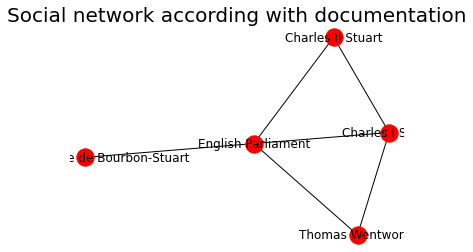

In [68]:
#Blocco principale in cui viene costruito il social network
personaggi_net=person_doc(root)
prsng_tot=[]
for i in personaggi_net:
  prsng_tot.append(list(sorted(set(i)))) 
lista_pers = sorted(set(sum(prsng_tot,[])))
n_pers=len(lista_pers)#Calcolo delle persone nel documento
edg=[]
for i in prsng_tot:
  funz_edg(i)

network_documento=nx.Graph()#Blocco che crea il social network
network_documento.add_nodes_from(lista_pers)
network_documento.add_edges_from(edg)

comp=nx.connected_components(network_documento)#Istruzioni per il calcolo dei cliques e dei components
cliq=nx.find_cliques(network_documento)

print('Personaggi presenti nel documento',n_pers)#Serie di stampa a schermo di valori connessi al network
print('Clique del network:', len(list(cliq)))
print('Densità del network:', nx.density(network_documento))
print('Coefficiente medio di clustering:', nx.average_clustering(network_documento))
print('Componenti connessi:', len(list(comp)))

plt.title('Social network according with documentation',fontsize = 20)#Istruzioni della libreria per visualizzare il social network
n_pers=nx.spring_layout(network_documento,k=2,scale=1, iterations=70)
nx.draw(network_documento,n_pers,node_color='r')
nx.draw_networkx_labels(network_documento,n_pers)
plt.show()


In [69]:
print('Network Pagerank del documento selezionato')#Serie di stampe di alcuni valori analizzati relativi al social network
peso=nxa.pagerank(network_documento)#Le istruzioni presenti provengono dalla libreria networkx.algorithms
sorted((v, f"{c:0.2f}") for v, c in peso.items())

Network Pagerank del documento selezionato


[('Charles I Stuart', '0.24'),
 ('Charles II Stuart', '0.17'),
 ('English Parliament', '0.32'),
 ('Henriette-Marie de Bourbon-Stuart', '0.10'),
 ('Thomas Wentworth', '0.17')]

In [70]:
print('Network closeness del documento selezionato')
closeness=nxa.closeness_centrality(network_documento)
sorted((v, f"{c:0.2f}") for v, c in closeness.items())

Network closeness del documento selezionato


[('Charles I Stuart', '0.80'),
 ('Charles II Stuart', '0.67'),
 ('English Parliament', '1.00'),
 ('Henriette-Marie de Bourbon-Stuart', '0.57'),
 ('Thomas Wentworth', '0.67')]

In [71]:
print('Diametro Network del documento selezionato')
print(nx.diameter(network_documento))

Diametro Network del documento selezionato
2


In [72]:
print('Network degree del documento selezionato')
degree=nxa.degree_centrality(network_documento)
sorted((v, f"{c:0.2f}") for v, c in degree.items()) 

Network degree del documento selezionato


[('Charles I Stuart', '0.75'),
 ('Charles II Stuart', '0.50'),
 ('English Parliament', '1.00'),
 ('Henriette-Marie de Bourbon-Stuart', '0.25'),
 ('Thomas Wentworth', '0.50')]

In [73]:
#Blocco per estrarre e inserire in liste i luoghi presenti nel documento, i Topics e le persone.
luoghi=[]
for item in root.iter('from'):#Istruzione che scorre il documento alla ricerca dei luoghi
  luoghi.append(item.text)#Istruzione che inserisce l'elemento trovato nella lista
  argomenti=[]
for item in root.iter('newsTopic'):#Istruzione che scorre il documento alla ricerca dei topic
  argomenti.append(item.text)#Istruzione che inserisce l'elemento trovato nella lista
personaggi1=[]
for item in root.iter('newsPeople'):#Istruzione che scorre il documento alla ricerca dei Personaggi
  personaggi1.append(item.text)#Istruzione che inserisce l'elemento trovato nella lista


In [74]:
#Blocco per costruire una tabella che ci permette di vedere quante volte un singolo luogo è presente nel documento
df=pd.DataFrame(luoghi, columns=['Luoghi']) 
df=df.groupby(['Luoghi']).size().reset_index(name="Volte")#questa istruzione permette di raggruppare i luoghi in relazione al numero di volte che compaiono
df

,Luoghi,Volte
0,London,3
1,London Tower,1
2,Palace of Westminster,4


In [75]:
#Blocco per costruire una tabella che ci permette di vedere quante volte un singolo Topic è presente nel documento
df=pd.DataFrame(argomenti, columns=['Topics'])#L'istruzione proviene dalla libreria Panda
df=df.groupby(['Topics']).size().reset_index(name="Volte")#questa istruzione permette di raggruppare i Topic in relazione al numero di volte che compaiono
df

,Topics,Volte
0,Government,1
1,Health,1
2,Law and Order,1
3,Movement,1
4,Politics,6
5,Religion,1


In [76]:
#Blocco per costruire una tabella che ci permette di vedere quante volte un singolo Topic è presente nel documento
df=pd.DataFrame(personaggi1, columns=['Personaggi'])
df=df.groupby(['Personaggi']).size().reset_index(name="Volte")#questa istruzione permette di raggruppare i personaggi in relazione al numero di volte che compaiono
df

,Personaggi,Volte
0,Charles I Stuart,3
1,Charles II Stuart,1
2,English Parliament,6
3,Henriette-Marie de Bourbon-Stuart,1
4,Thomas Wentworth,1


In [77]:
#Blocco che ci consente di assegnare il file XLSX ad una variabile e visualizzarlo come tabella
upload="/content/info_Salvetti.xlsx"
table_salvetti=pd.read_excel(upload)
table_salvetti 

,Personaggio di riferimento,Charles I Stuart,Henriette Maria De Bourbon-Stuart,Maria de' Medici De Bourbon-Stuart,English Parliament,Scottish Parliament,Giovanni Giustinian,Maurice von der Pfalz,Rupert von der Pfalz,Williem II van Oranje-Nassau,Thomas Wentworth,Charles II Stuart,Robert Devereux,Henry Rich,John Digby,William I Cavendish,Robert Rich,Mary Henriette,James II Stuart,Herry Montagu,Ralph Hopton,Lucius Cary,William Cecil
0,Charles I Stuart,0,71,39,102,26,5,44,9,6,6,7,11,9,6,14,17,2,6,6,18,14,20
1,Henriette Maria De Bourbon-Stuart,71,0,21,43,11,0,0,1,7,0,9,0,0,0,0,0,0,4,0,0,0,0
2,Maria de' Medici De Bourbon-Stuart,39,21,0,20,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,English Parliament,102,43,20,0,24,7,9,7,0,6,4,94,61,42,39,27,3,4,27,19,9,14
4,Scottish Parliament,26,11,2,24,0,2,0,0,0,0,7,9,2,2,0,4,0,3,2,4,1,2
5,Giovanni Giustinian,5,0,1,7,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
6,Maurice von der Pfalz,44,0,0,9,0,0,0,6,0,0,0,6,4,9,0,0,0,0,9,7,0,4
7,Rupert von der Pfalz,9,1,0,7,0,0,4,0,0,0,0,0,4,0,0,0,0,0,6,0,0,2
8,Williem II van Oranje-Nassau,6,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,6,0,0,0,0
9,Thomas Wentworth,6,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
#Blocco che riformula la tabella in maniera da poter utilizzare le colonne direttamente come gli elementi fondanti del network che andremo a creare
norm_salvetti= pd.melt(table_salvetti, id_vars=['Personaggio di riferimento'], var_name='P. incontrato', value_name='Numero di volte')
norm_salvetti 

,Personaggio di riferimento,P. incontrato,Numero di volte
0,Charles I Stuart,Charles I Stuart,0
1,Henriette Maria De Bourbon-Stuart,Charles I Stuart,71
2,Maria de' Medici De Bourbon-Stuart,Charles I Stuart,39
3,English Parliament,Charles I Stuart,102
4,Scottish Parliament,Charles I Stuart,26
...,...,...,...
479,James II Stuart,William Cecil,4
480,Herry Montagu,William Cecil,2
481,Ralph Hopton,William Cecil,7
482,Lucius Cary,William Cecil,2


In [79]:
#Istruzione che crea il network prendendo i singoli campi della tabella precedente al fine di crearne un network
G= nx.from_pandas_edgelist(norm_salvetti,source='Personaggio di riferimento',target='P. incontrato',edge_attr='Numero di volte',create_using=nx.DiGraph())

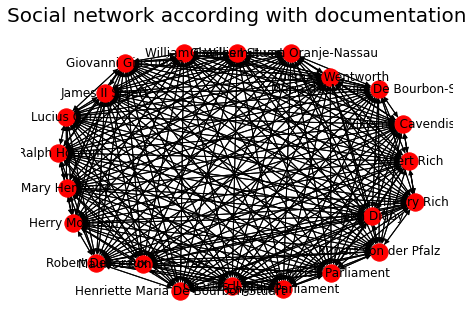

In [80]:
#Blocco per la stampa del network proveniente dal file XLSX
pers_doc=nx.spring_layout(G, k=8, scale=5, iterations=70) 
nx.draw(G,pers_doc,node_color='r')
nx.draw_networkx_labels(G,pers_doc)
plt.title('Social network according with documentation',fontsize = 20)
plt.show()

In [81]:
G.out_degree(weight='Numero di volte')#Output del Degree del network impostando come 'peso' il valore delle volte in cui si incontrarno i personaggi

OutDegreeView({'Charles I Stuart': 438, 'Henriette Maria De Bourbon-Stuart': 167, "Maria de' Medici De Bourbon-Stuart": 84, 'English Parliament': 561, 'Scottish Parliament': 101, 'Giovanni Giustinian': 17, 'Maurice von der Pfalz': 98, 'Rupert von der Pfalz': 33, 'Williem II van Oranje-Nassau': 32, 'Thomas Wentworth': 12, 'Charles II Stuart': 36, 'Robert Devereux': 158, 'Henry Rich': 123, 'John Digby': 102, 'William I Cavendish': 106, 'Robert Rich': 71, 'Mary Henriette': 33, 'James II Stuart': 50, 'Herry Montagu': 81, 'Ralph Hopton': 89, 'Lucius Cary': 63, 'William Cecil': 80})

In [85]:
deg_cen_points = dict(G.in_degree(weight='Numero di volte'))#Output del Degree central point del network impostando come 'peso' il valore delle volte in cui si incontrarno i personaggi
deg_cen_points

{'Charles I Stuart': 438,
 'Charles II Stuart': 35,
 'English Parliament': 561,
 'Giovanni Giustinian': 17,
 'Henriette Maria De Bourbon-Stuart': 167,
 'Henry Rich': 123,
 'Herry Montagu': 81,
 'James II Stuart': 50,
 'John Digby': 102,
 'Lucius Cary': 63,
 "Maria de' Medici De Bourbon-Stuart": 84,
 'Mary Henriette': 33,
 'Maurice von der Pfalz': 96,
 'Ralph Hopton': 89,
 'Robert Devereux': 158,
 'Robert Rich': 71,
 'Rupert von der Pfalz': 35,
 'Scottish Parliament': 101,
 'Thomas Wentworth': 12,
 'William Cecil': 80,
 'William I Cavendish': 106,
 'Williem II van Oranje-Nassau': 33}

In [84]:
between = dict(nx.betweenness_centrality(G,weight='Numero di volte'))#Output della Betweenness del network impostando come 'peso' il valore delle volte in cui si incontrarno i personaggi
between

{'Charles I Stuart': 0.05,
 'Charles II Stuart': 32.9939761419061,
 'English Parliament': 0.05,
 'Giovanni Giustinian': 572.9704524445863,
 'Henriette Maria De Bourbon-Stuart': 480.1714638449636,
 'Henry Rich': 0.34880838814899706,
 'Herry Montagu': 0.49123262212209806,
 'James II Stuart': 0.2637445848916435,
 'John Digby': 0.4072875167701238,
 'Lucius Cary': 1.0848729018708843,
 "Maria de' Medici De Bourbon-Stuart": 420.9206162682858,
 'Mary Henriette': 33.4992357928088,
 'Maurice von der Pfalz': 69.81126506727395,
 'Ralph Hopton': 0.6288443198299211,
 'Robert Devereux': 1.6151538316439022,
 'Robert Rich': 6.243432263868293,
 'Rupert von der Pfalz': 341.5598959560677,
 'Scottish Parliament': 5.2841920586239866,
 'Thomas Wentworth': 304.13024239627805,
 'William Cecil': 0.4988640340338343,
 'William I Cavendish': 2.022779388345657,
 'Williem II van Oranje-Nassau': 844.2802674609994}

In [86]:
degree=nxa.degree_centrality(G) #Output del degree del network
sorted((v, f"{c:0.2f}") for v, c in degree.items()) 

[('Charles I Stuart', '2.10'),
 ('Charles II Stuart', '2.10'),
 ('English Parliament', '2.10'),
 ('Giovanni Giustinian', '2.10'),
 ('Henriette Maria De Bourbon-Stuart', '2.10'),
 ('Henry Rich', '2.10'),
 ('Herry Montagu', '2.10'),
 ('James II Stuart', '2.10'),
 ('John Digby', '2.10'),
 ('Lucius Cary', '2.10'),
 ("Maria de' Medici De Bourbon-Stuart", '2.10'),
 ('Mary Henriette', '2.10'),
 ('Maurice von der Pfalz', '2.10'),
 ('Ralph Hopton', '2.10'),
 ('Robert Devereux', '2.10'),
 ('Robert Rich', '2.10'),
 ('Rupert von der Pfalz', '2.10'),
 ('Scottish Parliament', '2.10'),
 ('Thomas Wentworth', '2.10'),
 ('William Cecil', '2.10'),
 ('William I Cavendish', '2.10'),
 ('Williem II van Oranje-Nassau', '2.10')]

In [87]:
closeness=nxa.closeness_centrality(G)#Output della closeness del network
sorted((v, f"{c:0.2f}") for v, c in closeness.items())

[('Charles I Stuart', '1.00'),
 ('Charles II Stuart', '1.00'),
 ('English Parliament', '1.00'),
 ('Giovanni Giustinian', '1.00'),
 ('Henriette Maria De Bourbon-Stuart', '1.00'),
 ('Henry Rich', '1.00'),
 ('Herry Montagu', '1.00'),
 ('James II Stuart', '1.00'),
 ('John Digby', '1.00'),
 ('Lucius Cary', '1.00'),
 ("Maria de' Medici De Bourbon-Stuart", '1.00'),
 ('Mary Henriette', '1.00'),
 ('Maurice von der Pfalz', '1.00'),
 ('Ralph Hopton', '1.00'),
 ('Robert Devereux', '1.00'),
 ('Robert Rich', '1.00'),
 ('Rupert von der Pfalz', '1.00'),
 ('Scottish Parliament', '1.00'),
 ('Thomas Wentworth', '1.00'),
 ('William Cecil', '1.00'),
 ('William I Cavendish', '1.00'),
 ('Williem II van Oranje-Nassau', '1.00')]

In [ ]:
norm_salvetti.groupby("Personaggio di riferimento").mean() #Blocco che produce la media di quante volte i personaggi di riferimento incontrano altri personaggi

In [89]:
norm_salvetti.groupby("Personaggio di riferimento").median() #Blocco che produce la mediana di quante volte i personaggi di riferimento incontrano altri personaggi

,Numero di volte
Personaggio di riferimento,
Charles I Stuart,10.0
Charles II Stuart,0.0
English Parliament,16.5
Giovanni Giustinian,0.0
Henriette Maria De Bourbon-Stuart,0.0
Henry Rich,2.0
Herry Montagu,2.0
James II Stuart,1.5
John Digby,2.0


In [ ]:
#Blocco che ci consente di assegnare il file XLSX ad una variabile e visualizzarlo come tabella
upload="/content/topics.xlsx"
topics=pd.read_excel(upload)
topics

In [ ]:
#Blocco che riorganizza la tabella in tre colonne ben distinte
norm_topics= pd.melt(topics, id_vars=['Personaggio'], var_name='Topic', value_name='Numero di volte')
norm_topics

In [92]:
norm_topics.groupby("Topic").mean()#Blocco he produce la media dei topic che compaiono nel corpus

,Numero di volte
Topic,
Commercio,2.363636
Dinastia,4.681818
Governo,9.863636
Guerra,19.272727
Movimento,8.500000
Politica,18.363636
Religione,6.863636
Salute,0.500000


In [93]:
norm_topics.groupby("Topic").median()#Blocco he produce la mediana dei topic che compaiono nel corpus

,Numero di volte
Topic,
Commercio,0.0
Dinastia,0.5
Governo,4.0
Guerra,19.0
Movimento,6.0
Politica,13.0
Religione,0.0
Salute,0.0


In [94]:
#Blocco che stampa quante volte ogni singolo personaggio compare in una notizia con il topic Guerra
war=norm_topics[norm_topics['Topic']=='Guerra']
war

,Personaggio,Topic,Numero di volte
0,Charles I Stuart,Guerra,55
1,Henriette Maria De Bourbon-Stuart,Guerra,21
2,Maria de' Medici De Bourbon-Stuart,Guerra,2
3,English Parliament,Guerra,51
4,Scottish Parliament,Guerra,33
5,Giovanni Giustinian,Guerra,0
6,Maurice von der Pfalz,Guerra,27
7,Rupert von der Pfalz,Guerra,22
8,Williem II van Oranje-Nassau,Guerra,0
9,Thomas Wentworth,Guerra,3
